<h1 align="center"> Homework 8 Programming Task</h1>
<h3 align="center"> IST 5520, 2022 Fall </h3>
<h3 align="center"> Student: Ronald Adomako </h3>

In [32]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import scipy.stats as stats
import seaborn as sns
from statsmodels.formula.api import ols

%matplotlib inline

# Task: Regression Analysis

The data file “UniversalBank.csv” contains a dataset of 5000 customers of the Universal Bank. 
Below is the description of columns in the dataset.
- Id: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\$000)
- ZIPCode: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\$000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\$000)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have a securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?
Note: Since Education should be categorical variable, you need to convert it into dummies.

Complete the following task and questions.


## Programming Task: (6 points)
Conduct a multiple linear regression analysis. 

Regress Personal_Loan on other variables except Id and ZIP_Code. 


## (1) Read in dataset

In [33]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [34]:
df.sample(5)

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2795,2796,51,25,91,92407,1,0.8,3,0,0,0,0,0,0
2645,2646,36,12,93,95125,2,2.2,1,0,0,0,0,1,0
90,91,55,30,118,90277,4,5.6,2,0,1,0,0,1,0
4211,4212,40,16,104,94301,2,1.8,2,0,0,0,0,0,0
1743,1744,50,24,32,94701,4,1.8,1,109,0,0,0,1,0


In [35]:
df.describe()

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## (2) Regression Analysis

In [37]:
#sns.regplot?

## Let's compare loans to Income

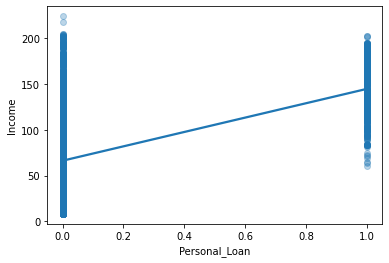

In [38]:
ax = sns.regplot(x='Personal_Loan', 
                 y='Income', 
                 data=df, 
                 ci=None, 
                 scatter_kws={'alpha':0.3})

We see there are outliers for both loans rejected and accepted near and above \\$ 200K. For loans accepted, the outlier near and below income of \\$75k

### Let's see their pearson correlation coefficient

In [101]:
#stats.pearsonr?

In [40]:
stats.pearsonr(df['Personal_Loan'],df['Income'])

(0.5024622924949342, 3.560286e-318)

The correlation between Personal_Loan and Income is significant:
Pearson_R = 50.24%, p ~ 0% < 5%.

We can say that Personal Loan and Income are half correlated.

In [44]:
# i.e. half the time one can predict the outcome of the other. 
#(For a binary variable, such as Personal Loans, 
#this is similar to what we would expect in experiment if they were uncorrelated!) 
#We learn that we have a significant variable, Income, 
#but itself is not predictive of Personal Loan: we need more significant variables.

In [45]:
#fit1.summary?

In [47]:
fit1 = ols("Personal_Loan ~ Income", data = df).fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1688.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          3.56e-318
Time:                        22:55:40   Log-Likelihood:                -256.41
No. Observations:                5000   AIC:                             516.8
Df Residuals:                    4998   BIC:                             529.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1412      0.007    -20.752      0.000      -0.155      -0.128
Income         0.0032   7.83e-05     41.085      0.000       0.003       0.003
==============================================================================
Omnibus:                     1454.882   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3826.300
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       5.917   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### when NO constant term:

In [55]:
y_avg = np.average(df['Personal_Loan'])
y_avg

0.096

In [56]:
fit2 = ols("Personal_Loan ~ Income - 1", data = df).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Personal_Loan   R-squared (uncentered):                   0.266
Model:                            OLS   Adj. R-squared (uncentered):              0.266
Method:                 Least Squares   F-statistic:                              1812.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:02:02   Log-Likelihood:                         -463.05
No. Observations:                5000   AIC:                                      928.1
Df Residuals:                    4999   BIC:                                      934.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income         0.0018   4.32e-05     42.564      0.000       0.002       0.002
==============================================================================
Omnibus:                     2311.735   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9116.220
Skew:                           2.382   Prob(JB):                         0.00
Kurtosis:                       7.590   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit a Linear Model Using StatsModel Package

In [57]:
df_ed = df['Education']
df_ed

0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Education, Length: 5000, dtype: int64

In [66]:
df_ed_dum = pd.get_dummies(df_ed)
df_ed_dum 

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,0,0,1
4996,1,0,0
4997,0,0,1
4998,0,1,0


In [59]:
df_ed.unique()

array([1, 2, 3])

In [65]:
df_mod = df.drop(columns ='Education')
df_mod

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0


In [74]:
#pd.concat([df_mod,df_ed_dum], ignore_index=True)
'Concat obtains floats for dummy columns and array has NaNs';

In [76]:
df_ed_dum.columns

Int64Index([1, 2, 3], dtype='int64')

#### Add Education columns manually

In [78]:
df_mod['Ed_1'] = df_ed_dum[1]
df_mod['Ed_2'] = df_ed_dum[2]
df_mod['Ed_3'] = df_ed_dum[3]
df_mod

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Ed_1,Ed_2,Ed_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0,0,1
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0,0,1
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [81]:
df_var = df_mod.drop(columns=['ZIP_Code','Id'])
df_var

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Ed_1,Ed_2,Ed_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,85,0,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,0,1,0,0,1,0


In [82]:
df_scale = scale(df_var)
df_scale

array([[-1.77441684, -1.66607847, -0.53822878, ...,  1.17707102,
        -0.62453764, -0.65496543],
       [-0.02952359, -0.09633022, -0.8641094 , ...,  1.17707102,
        -0.62453764, -0.65496543],
       [-0.55299157, -0.44516316, -1.36379301, ...,  1.17707102,
        -0.62453764, -0.65496543],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.84956641,
        -0.62453764,  1.52679815],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.84956641,
         1.60118452, -0.65496543],
       [-1.51268285, -1.40445376,  0.20043396, ...,  1.17707102,
        -0.62453764, -0.65496543]])

Pre-scaled version takes too long.

The coefficients for linear regression are solved 
for implicitly and should account for scaling.

In [96]:
# mod_full = ols('Personal_Loan ~ Age + Experience + Income + Family + CCAvg \
#                + Mortgage + Securities_Account + CD_Account + Online + CreditCard \
#                + Ed_1 + Ed_2 + Ed_3', data = df_scale)
# mod_full_fit = model_fill.fit()
# model_full_fit


#### Try fit instead of scaling for OLS

In [97]:
mod_full_unscaled = ols('Personal_Loan ~ Age + Experience + Income + Family + CCAvg \
               + Mortgage + Securities_Account + CD_Account + Online + CreditCard \
               + Ed_1 + Ed_2 + Ed_3', data = df_var)

mod_full_unscaled_fit = mod_full_unscaled.fit()
mod_full_unscaled_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     273.2
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:51:33   Log-Likelihood:                 279.29
No. Observations:                5000   AIC:                            -532.6
Df Residuals:                    4987   BIC:                            -447.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0580      0.053     -1.096      0.273      -0.162       0.046
Age                   -0.0053      0.003     -1.952      0.051      -0.011    2.38e-05
Experience             0.0059      0.003      2.152      0.031       0.001       0.011
Income                 0.0031   9.62e-05     31.854      0.000       0.003       0.003
Family                 0.0302      0.003     10.438      0.000       0.025       0.036
CCAvg                  0.0122      0.002      4.986      0.000       0.007       0.017
Mortgage            6.759e-05   3.27e-05      2.069      0.039    3.55e-06       0.000
Securities_Account    -0.0598      0.011     -5.295      0.000      -0.082      -0.038
CD_Account             0.3261      0.016     20.784      0.000       0.295       0.357
Online                -0.0275      0.007     -4.086      0.000      -0.041      -0.014
CreditCard            -0.0438      0.007     -5.851      0.000      -0.058      -0.029
Ed_1                  -0.1193      0.017     -6.912      0.000      -0.153      -0.085
Ed_2                   0.0261      0.018      1.430      0.153      -0.010       0.062
Ed_3                   0.0351      0.019      1.826      0.068      -0.003       0.073
==============================================================================
Omnibus:                     1287.809   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3280.364
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       5.819   Cond. No.                     7.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
mod_full_unscaled_fit.eigenvals

array([8.85111258e+07, 2.66748584e+07, 3.84626630e+06, 1.29494141e+05,
       8.87922637e+03, 6.28188850e+03, 1.73347295e+03, 1.42990252e+03,
       1.21120356e+03, 1.06254835e+03, 5.12488263e+02, 1.87162547e+02,
       1.40111808e+01, 1.72716890e-28])

#### Try dropping Ed_3 column

In [99]:
mod_full_unscaled_2 = ols('Personal_Loan ~ Age + Experience + Income + Family + CCAvg \
               + Mortgage + Securities_Account + CD_Account + Online + CreditCard \
               + Ed_1 + Ed_2', data = df_var)

mod_full_unscaled_fit_2 = mod_full_unscaled_2.fit()
mod_full_unscaled_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     273.2
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:57:03   Log-Likelihood:                 279.29
No. Observations:                5000   AIC:                            -532.6
Df Residuals:                    4987   BIC:                            -447.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0228      0.072     -0.319      0.750      -0.163       0.118
Age                   -0.0053      0.003     -1.952      0.051      -0.011    2.38e-05
Experience             0.0059      0.003      2.152      0.031       0.001       0.011
Income                 0.0031   9.62e-05     31.854      0.000       0.003       0.003
Family                 0.0302      0.003     10.438      0.000       0.025       0.036
CCAvg                  0.0122      0.002      4.986      0.000       0.007       0.017
Mortgage            6.759e-05   3.27e-05      2.069      0.039    3.55e-06       0.000
Securities_Account    -0.0598      0.011     -5.295      0.000      -0.082      -0.038
CD_Account             0.3261      0.016     20.784      0.000       0.295       0.357
Online                -0.0275      0.007     -4.086      0.000      -0.041      -0.014
CreditCard            -0.0438      0.007     -5.851      0.000      -0.058      -0.029
Ed_1                  -0.1544      0.008    -18.914      0.000      -0.170      -0.138
Ed_2                  -0.0090      0.009     -1.045      0.296      -0.026       0.008
==============================================================================
Omnibus:                     1287.809   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3280.364
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       5.819   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
mod_full_unscaled_fit_2.eigenvals

array([8.85109111e+07, 2.66747527e+07, 3.84616152e+06, 1.29440049e+05,
       8.87896985e+03, 6.27743023e+03, 1.61533978e+03, 1.22031805e+03,
       1.06260647e+03, 5.25862468e+02, 5.12459132e+02, 1.86958097e+02,
       1.01680768e+01])

#### Try dropping all Ed columns

In [102]:
mod_full_unscaled_3 = ols('Personal_Loan ~ Age + Experience + Income + Family + CCAvg \
               + Mortgage + Securities_Account + CD_Account + Online + CreditCard', 
                          data = df_var)

mod_full_unscaled_fit_3 = mod_full_unscaled_3.fit()
mod_full_unscaled_fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     257.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:12:41   Log-Likelihood:                 55.234
No. Observations:                5000   AIC:                            -88.47
Df Residuals:                    4989   BIC:                            -16.78
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4089      0.072     -5.718      0.000      -0.549      -0.269
Age                    0.0079      0.003      2.844      0.004       0.002       0.013
Experience            -0.0073      0.003     -2.627      0.009      -0.013      -0.002
Income                 0.0028   9.97e-05     27.958      0.000       0.003       0.003
Family                 0.0347      0.003     11.573      0.000       0.029       0.041
CCAvg                  0.0103      0.003      4.058      0.000       0.005       0.015
Mortgage            6.477e-05   3.42e-05      1.896      0.058    -2.2e-06       0.000
Securities_Account    -0.0684      0.012     -5.789      0.000      -0.092      -0.045
CD_Account             0.3503      0.016     21.407      0.000       0.318       0.382
Online                -0.0299      0.007     -4.250      0.000      -0.044      -0.016
CreditCard            -0.0496      0.008     -6.344      0.000      -0.065      -0.034
==============================================================================
Omnibus:                     1414.380   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3980.910
Skew:                           1.489   Prob(JB):                         0.00
Kurtosis:                       6.201   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 1: (2 points)
According to the OLS, interpret the effect of Education on Personal_Loan? Does the effect statistically significant? Since the Personal_Loan is a dummy variable, you can interpret the coefficient as the change of probability. Explain the effect using business language (people with common business background can understand).

Your Answer:

On average, no. Education does not have significant effect on predicting personal after having at least one degree. I showed this by parsing out the three education types into dummy variables. In the first case, having an undergraduate degree is the only example where the P>|t| is under 5%, with the other degree types present, suggesting that more degrees does not help one get a loan.

It would be helpful to see non-degrees in this dataset to further compare, but it is clear that the first degree is significant in obtaining a loan.



#### Question 2: (2 points)
According to the OLS, interpret the effect of Age on Personal_Loan? Does the effect statistically significant? Explain the effect using business language (people with common business background can understand).

Your Answer:

Age is statistiscally significant on whether one gets a personal loan, because the p-value is less than 5%  (suggesting a high confidence interval). However, the impact of the Age variable is low: with 0.79%, one would have to at least 126 years old to guarantee acceptance of a loan or at least 63 years old to have a 50% chance or receiving a loan.


#### Extra Credit

Doing a regression analysis is a good step to identifying variables for an iterative dimensional analysis (most likely achievable in one step). I noticed the OLS suffered computationally when trying to pre-scale the data like we do for PCA. 

From this practice, I can see that if I cared about keeping the original components and not wanting to transform variables into a different coordinate space, I could run regression analysis to retain the significant variables iteratively until I got a result where I didn't have a high conditional score. This would help me identify the most significant variables.

If I cared about just predicting the whether the loan acceptance would be correctly predicted, then I could do a classification analysis employing PCA and scaling to find a model that clusters between loan accepted and loan rejected - Cluster Analysis. This may retain some of the lower significant variables and forego the insignificant ones although they wouldn't be explicitly mapped one-to-one since PCA transforms the coordinate space. The dimension reduction would be a hint of the number of significant variable - noting that all variables have a probability of significance or insignificance - partial significance. Classification analysis with PCA optimizes the weights of these variables while minimizing effects of multicollinearity otherwise the model wouldn't predict well on new data!


Submission:
Submit: (1) your jupyter notebook with results, and (2) this task document with answers.